In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [6]:
dataset = pd.read_csv('student_scores.csv')

In [7]:
dataset.shape

(25, 2)

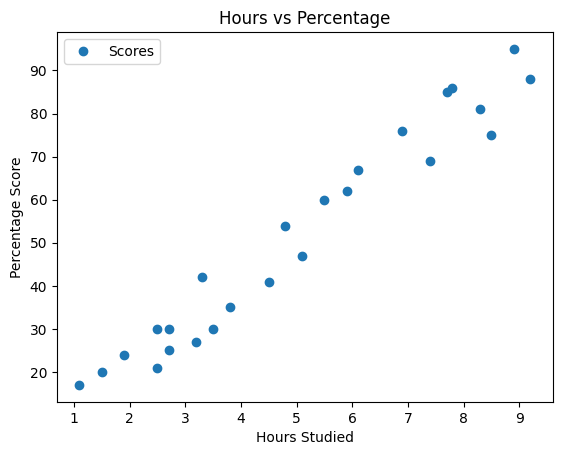

In [8]:
dataset.plot(x='Hours', y='Scores', style='o') 
plt.title('Hours vs Percentage') 
plt.xlabel('Hours Studied') 
plt.ylabel('Percentage Score') 
plt.show()

Теперь у нас есть представление о наших данных. Следующим шагом является разделение данных на «атрибуты» и «метки». Атрибуты – это независимые переменные, а метки – это зависимые переменные, значения которых должны быть предсказаны. В нашем наборе данных всего два столбца. Мы хотим предсказать процентную оценку в зависимости от изученных часов. Поэтому наш набор атрибутов будет состоять из столбца «Часы», а меткой будет столбец «Оценка».

In [9]:
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, 1].values

In [10]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Приведенный выше скрипт разделяет 80% данных на обучающий набор, а 20% данных – на набор тестов. Переменная test_size -–это то место, где мы фактически указываем пропорцию набора тестов.

In [11]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(X_train, y_train)

LinearRegression()

модель линейной регрессии в основном находит наилучшее значение для точки пересечения и наклона, в результате чего получается линия, которая наилучшим образом соответствует данным. Чтобы увидеть значение точки пересечения и наклона, вычисленное алгоритмом линейной регрессии для нашего набора данных, выполните следующий код.

In [12]:
print(regressor.intercept_)
print(regressor.coef_)

2.0181600414346974
[9.91065648]


Теперь, когда мы обучили наш алгоритм, пришло время сделать некоторые прогнозы. Для этого мы воспользуемся нашими тестовыми данными и посмотрим, насколько точно наш алгоритм предсказывает процентную оценку. Чтобы сделать прогнозы на тестовых данных, выполним следующий код

In [13]:
y_pred = regressor.predict(X_test)

Y_pred – это массив numpy, который содержит все предсказанные значения для входных значений в серии X_test. Чтобы сравнить фактические выходные значения для X_test с прогнозируемыми значениями, выполните следующий скрипт:

In [14]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Коэффициенты (sklearn): [938.23786125]
Свободный член (sklearn): 152.91886182616113
Коэффициенты (ручной метод): 938.2378612513517
Свободный член (ручной метод): 152.9188618261612


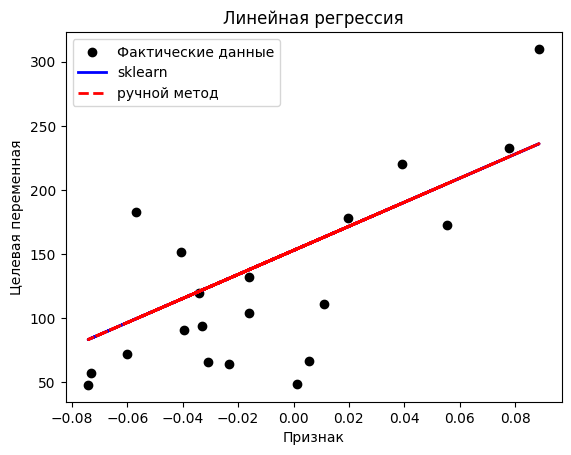

    Фактическое значение  Предсказание (sklearn)  Предсказание (ручной метод)
0                  233.0                  225.97                       225.97
1                   91.0                  115.75                       115.75
2                  111.0                  163.28                       163.28
3                  152.0                  114.74                       114.74
4                  120.0                  120.80                       120.80
5                   67.0                  158.22                       158.22
6                  310.0                  236.09                       236.09
7                   94.0                  121.82                       121.82
8                  183.0                   99.57                        99.57
9                   66.0                  123.84                       123.84
10                 173.0                  204.74                       204.74
11                  72.0                   96.53                

In [15]:

# Импорт библиотек
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
import pandas as pd

# Загрузка набора данных diabetes
diabetes = datasets.load_diabetes()
X = diabetes.data[:, np.newaxis, 2]  # Выбираем 3-й признак (индекс 2)
y = diabetes.target

# Разделение на обучающую и тестовую выборки
X_train = X[:-20]
X_test = X[-20:]
y_train = y[:-20]
y_test = y[-20:]

# Линейная регрессия с использованием sklearn
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred_sklearn = regr.predict(X_test)

print("Коэффициенты (sklearn):", regr.coef_)
print("Свободный член (sklearn):", regr.intercept_)

# Линейная регрессия вручную (метод наименьших квадратов)
X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]  # добавляем x0 = 1
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)
print("Коэффициенты (ручной метод):", theta_best[1])
print("Свободный член (ручной метод):", theta_best[0])

# Предсказания ручного метода
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]
y_pred_manual = X_test_b.dot(theta_best)

# Визуализация
plt.scatter(X_test, y_test, color="black", label="Фактические данные")
plt.plot(X_test, y_pred_sklearn, color="blue", linewidth=2, label="sklearn")
plt.plot(X_test, y_pred_manual, color="red", linewidth=2, linestyle="dashed", label="ручной метод")
plt.legend()
plt.title("Линейная регрессия")
plt.xlabel("Признак")
plt.ylabel("Целевая переменная")
plt.show()

# Таблица с предсказаниями
results = pd.DataFrame({
    "Фактическое значение": y_test,
    "Предсказание (sklearn)": y_pred_sklearn,
    "Предсказание (ручной метод)": y_pred_manual
})
print(results.round(2))
